<a href="https://colab.research.google.com/github/chavansrinu/AIMLbatch-17-/blob/main/AIML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
            print(os.path.join(dirname, filename))

In [2]:
df=pd.read_csv("/content/WineQT.csv")


In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [6]:
def cek_nilai_kosong(df):
      ada_kosong = df.isnull().values.any()
      if ada_kosong:
              print("Ada nilai kosong dalam DataFrame.")
              jumlah_kosong_per_kolom = df.isnull().sum()
              print("Jumlah nilai kosong per kolom:")
              print(jumlah_kosong_per_kolom)
              baris_dengan_kosong = df[df.isnull().any(axis=1)]
              print("Baris dengan nilai kosong:")
              print(baris_dengan_kosong.index.tolist()) # Menggunakan .index.tolist() untuk menampilkan indeks baris
      else:
              print("Tidak ada nilai kosong dalam DataFrame.")

In [7]:
cek_nilai_kosong(df)


Tidak ada nilai kosong dalam DataFrame.


In [8]:
# Membagi fitur dan target
X = df.drop(columns=['quality', 'Id'])  # fitur
y = df['quality']  # target



In [9]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [10]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Ubah variabel kategorikal menjadi bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
y.shape


(1143,)

In [13]:
y

array([2, 2, 2, ..., 2, 3, 2])

In [14]:
# Normalisasi fitur-fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled.shape


(1143, 11)

In [16]:
X_scaled



array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [17]:
class_values = df['quality'].unique()
print("Nilai kelas:", class_values)

Nilai kelas: [5 6 7 4 8 3]


In [18]:
jumlah_kelas=len(class_values)
print("jumlah kelas:",jumlah_kelas)

jumlah kelas: 6


In [19]:
class_counts = df['quality'].value_counts()
print(class_counts)

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


In [20]:
from imblearn.over_sampling import SMOTE

# Oversampling menggunakan SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [21]:
from keras.utils import to_categorical

# Ubah target menjadi one-hot encoding
y_resampled_encoded = to_categorical(y_resampled)


In [22]:

from sklearn.model_selection import train_test_split

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded,
                            test_size=0.2, random_state=42,stratify=y_resampled_encoded)


In [23]:

from keras.models import Sequential
from keras.layers import Dense

# Membangun model MLP
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(jumlah_kelas, activation='softmax'))  # jumlah neuron sesuai dengan jumlah kelas


In [24]:
from keras.optimizers import Adam

# Compile model dengan penyesuaian learning rate
#optimizer = Adam(learning_rate=0.001)
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [25]:

from keras.callbacks import EarlyStopping

# Early stopping untuk mencegah overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


In [26]:

# Latih model
history=model.fit(X_train, y_train, epochs=1000, batch_size=64,
                  validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/1000
37/37 [==============================] - 2s 9ms/step - loss: 1.7950 - accuracy: 0.1782 - val_loss: 1.7672 - val_accuracy: 0.1862
Epoch 2/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.7611 - accuracy: 0.2101 - val_loss: 1.7370 - val_accuracy: 0.2362
Epoch 3/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.7331 - accuracy: 0.2675 - val_loss: 1.7110 - val_accuracy: 0.2828
Epoch 4/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.7076 - accuracy: 0.3192 - val_loss: 1.6860 - val_accuracy: 0.3276
Epoch 5/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.6813 - accuracy: 0.3654 - val_loss: 1.6609 - val_accuracy: 0.3603
Epoch 6/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.6536 - accuracy: 0.3909 - val_loss: 1.6339 - val_accuracy: 0.3655
Epoch 7/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.6240 - accuracy: 0.3986 - val_loss: 1.6064 - val_accuracy: 0.3655
Epoch 

In [27]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

Exception ignored in: <function _xla_gc_callback at 0x7acd7a442830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


19/19 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.8397
Accuracy: 0.8396551609039307


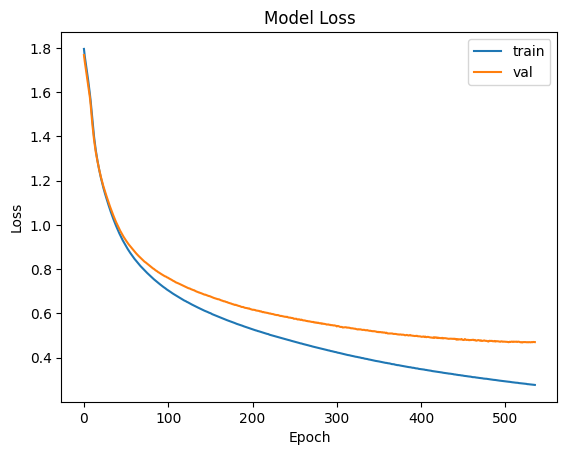

In [28]:
import matplotlib.pyplot as plt

# Plot kurva loss pelatihan dan validasi
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

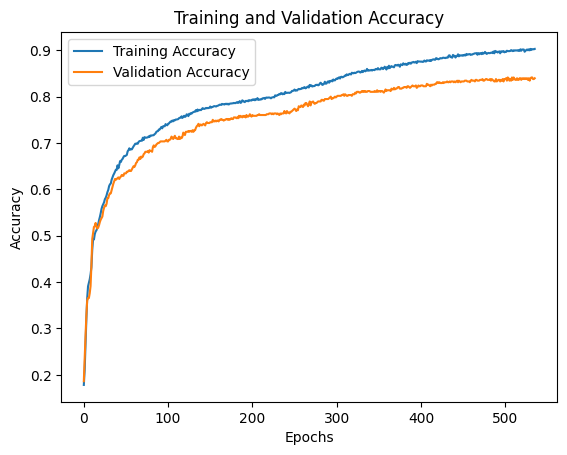

In [29]:
# Menyimpan akurasi dan val_akurasi
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Menggambar kurva akurasi
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 6)                 66        
                                                                 
Total params: 3244 (12.67 KB)
Trainable params: 3244 (12.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


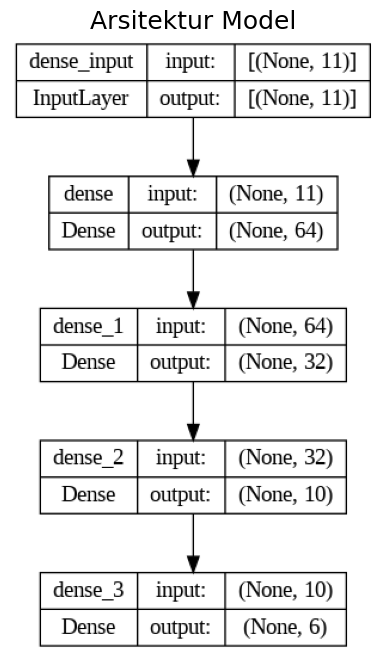

In [31]:
from keras.utils import plot_model

file_name = 'arsitektur_model.png'
# Menyimpan representasi grafis arsitektur model ke dalam file PNG
plot_model(model, to_file=file_name, show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8,8))  # Ubah ukuran gambar jika perlu
img = plt.imread(file_name)
plt.imshow(img)
plt.title('Arsitektur Model', fontsize=18)  # Ubah judul sesuai kebutuhan
plt.axis('off')  # Hilangkan sumbu
plt.savefig(file_name)  # Simpan gambar dengan judul
plt.show()

In [32]:
from sklearn.metrics import classification_report

# Prediksi kelas dari data pengujian
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get unique class values from the 'quality' column
class_values = df['quality'].unique()

# Definisikan nama target (kelas) dan konversi ke string
target_names = [str(class_value) for class_value in class_values]

# Konversi one-hot encoding menjadi kelas asli
y_test_classes = np.argmax(y_test, axis=1)

# Classification report
report = classification_report(y_test_classes, y_pred_classes,target_names=target_names)
print(report)

19/19 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           5       0.98      1.00      0.99        97
           6       0.94      0.95      0.94        97
           7       0.72      0.60      0.65        97
           4       0.64      0.63      0.63        97
           8       0.82      0.88      0.84        96
           3       0.92      0.99      0.95        96

    accuracy                           0.84       580
   macro avg       0.83      0.84      0.84       580
weighted avg       0.83      0.84      0.84       580



19/19 [==============================] - 0s 5ms/step


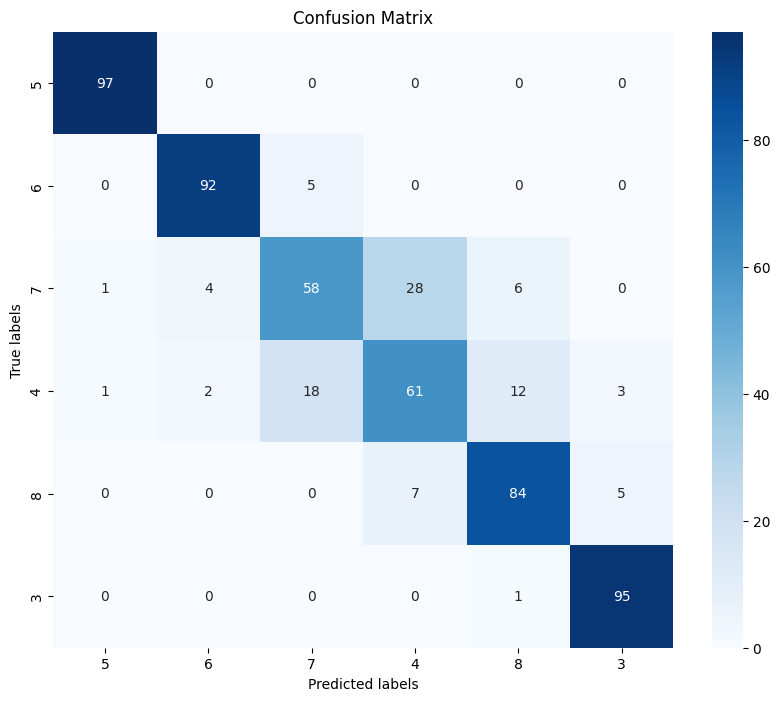

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prediksi kelas dari data pengujian
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Konversi one-hot encoding menjadi kelas asli
y_test_classes = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Simpan model ke dalam file
model.save("model_anggur.h5")

from keras.models import load_model

# Muat model dari file
model = load_model("model_anggur.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
